In [1]:
import librosa
import scipy.io.wavfile as wav
import numpy as np

# load audio file
y, sr = librosa.load("1.wav")

# perform VAD using librosa
vad = librosa.effects.split(y, top_db=30, frame_length=2048, hop_length=512)
print(vad)
# Extract the speech segments
speech_segments = [y[start:end] for start, end in vad]

# save each speech segments as a separate audio file
for i, segment in enumerate(speech_segments):
    wav.write("speaker_{}.wav".format(i), sr, segment)


c:\Users\xfini\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


[[ 15360  76800]
 [ 80896  88064]
 [ 94720 162816]
 [172032 175104]
 [176640 226304]]


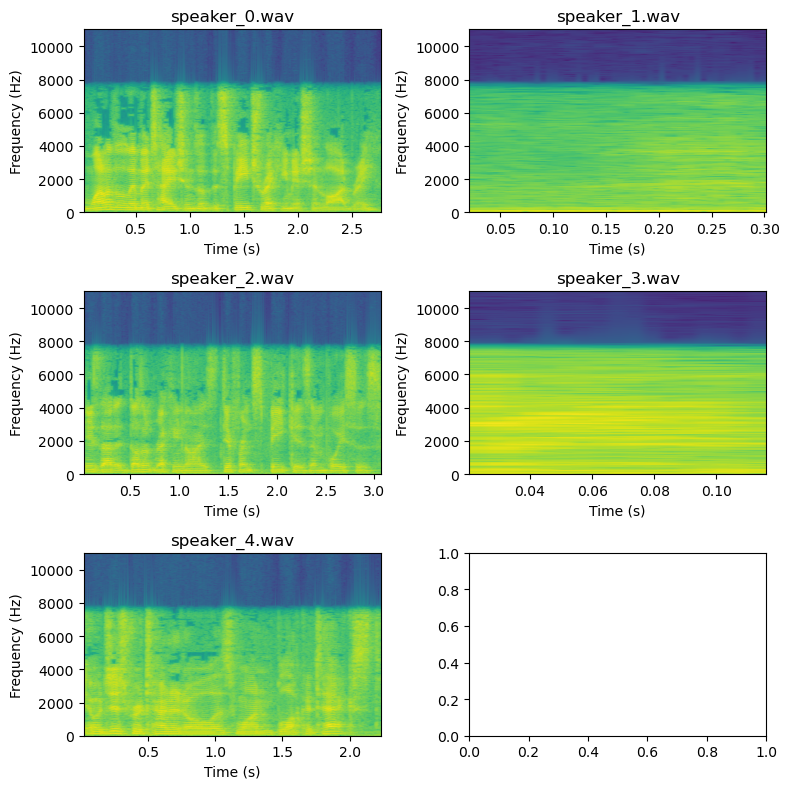

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read

# List of audio file names
audio_files = ["speaker_0.wav", "speaker_1.wav", "speaker_2.wav", "speaker_3.wav","speaker_4.wav"]

fig, axs = plt.subplots(3,2, figsize=(8,8))

# Flatten the subplots array to a 1D array
axs = axs.ravel()

# Loop through the audio files
for i, file in enumerate(audio_files):
    # Read in the audio file
    rate, data = read(file)

    # Create a spectrogram of the audio
    axs[i].specgram(data, NFFT=1024, Fs=rate, noverlap=900)
    axs[i].set_title(file)
    axs[i].set_xlabel("Time (s)")
    axs[i].set_ylabel("Frequency (Hz)")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


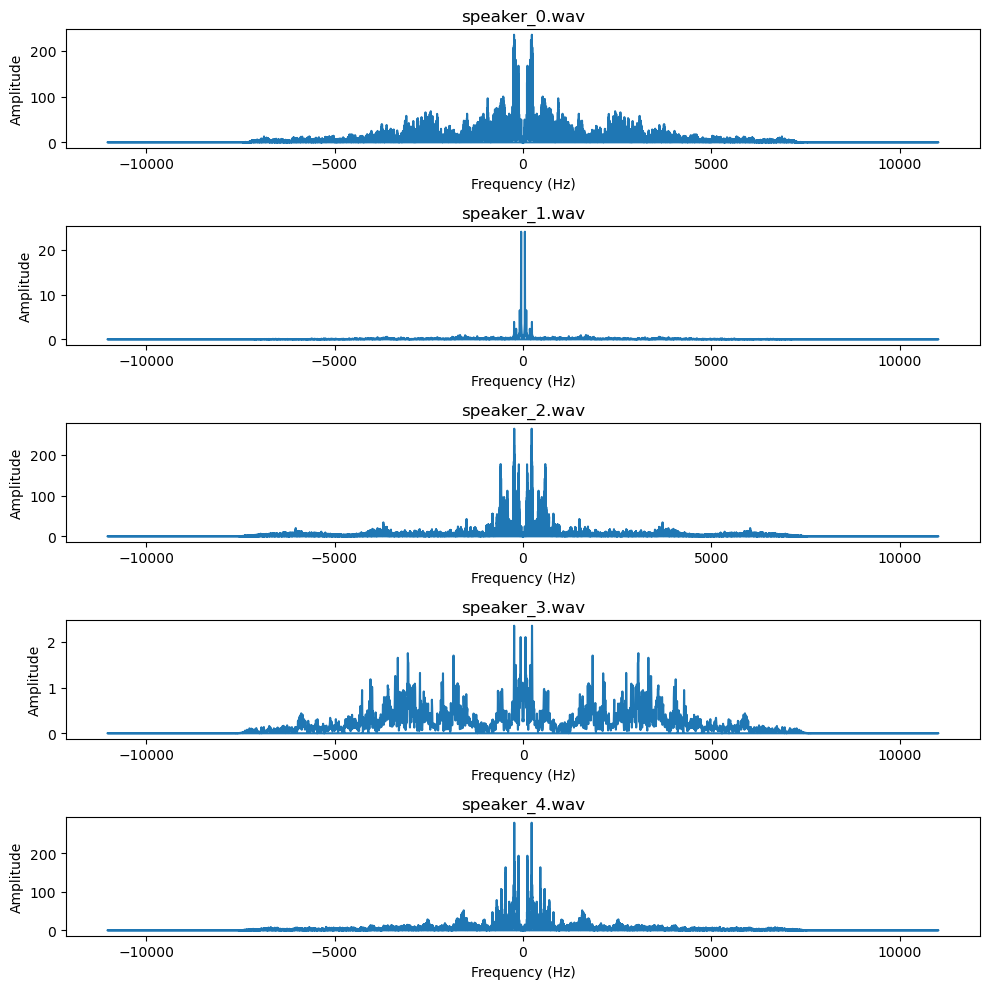

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read

# List of audio file names
audio_files = ["speaker_0.wav", "speaker_1.wav", "speaker_2.wav", "speaker_3.wav","speaker_4.wav"]
# Find the number of subplots needed
n_subplots = len(audio_files)

# Create a figure with subplots
fig, axs = plt.subplots(n_subplots, 1, figsize=(10,10))

# Loop through the audio files
for i, file in enumerate(audio_files):
    # Read in the audio file
    rate, data = read(file)

    # Get the audio data in the frequency domain
    frequency_data = np.fft.fft(data)

    # Get the frequencies of the audio data
    frequencies = np.fft.fftfreq(len(frequency_data), d=1/rate)

    # Plot the audio data in the frequency domain
    axs[i].plot(frequencies, np.abs(frequency_data))
    axs[i].set_xlabel("Frequency (Hz)")
    axs[i].set_ylabel("Amplitude")
    axs[i].set_title(file)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()
